### Importaciones

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin

### Definicion de la funcion

Nuestra funcion por defecto es $f(t,x) = x$  
( Más adelante veremos que podemos cambiar la función si se requiere)

In [67]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

*Digite el numero de iteraciones deseadas:*

In [68]:
numero_iteraciones = 5

*Digite el valor inicial en t:*

In [69]:
paso_inicial_T = 0

*Digite el valor final en t:*

In [70]:
paso_final_T = 1

*Digite la condicion inicial de $x(t)$:*

In [71]:
paso_inicial_X = 0.3

*A continuación calcularemos el $\Delta t$*

In [72]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones

### Iniciemos con la solucion exacta

In [73]:
# Definir la variable independiente 
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

funcion_m = 2*t*(1+x**2)
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
print(edo)
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, paso_inicial_T): paso_inicial_X})
solucion

-2*t*(x(t)**2 + 1) + Derivative(x(t), t)


Eq(x(t), tan(t**2 + 0.291456794477867))

$2t(x(t)^{2} + 1) $

In [74]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*100):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 100) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

### Definición de las variables simbolicas

In [75]:
t, x = sp.symbols('t x')

### Si requerimos cambiar la funcion, aqui la definimos:

In [76]:
fun = "(2*t*(1+x**2))"

Creamos la funcion proframarica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [77]:
func_f = funcion_f()
func_f

x

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [78]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar) * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [79]:
vector_T_euler

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [80]:
vector_X_euler

array([0.3, 0.360000000000000, 0.432000000000000, 0.518400000000000,
       0.622080000000000, 0.746496000000000], dtype=object)

### Grafiquemos

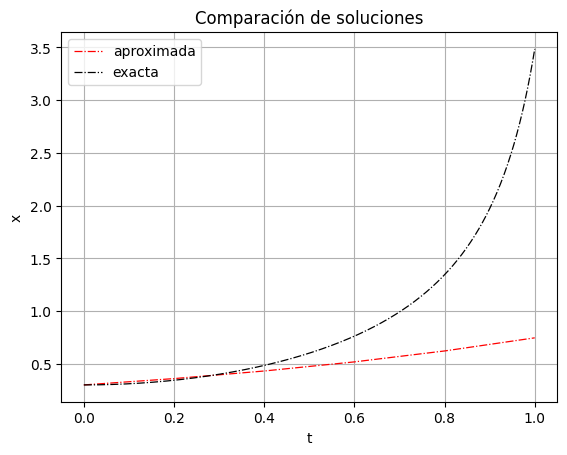

In [81]:
plt.plot(vector_T_euler, vector_X_euler, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-.', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

## Metodo de Euler mejorado

$x_{k+1} = x_{k} + (\frac{m_{k} + n_{k}}{2})\Delta t $

In [82]:
#t, x = sp.symbols('t x')

Como podemos notar el metodo de euler mejorado requiere que se definan tanto $m_{k}$ como $n_{k}$ entonces empecemos definiendolas:

$m_{k} = f(t_{k},x_{k})$  
aqui solo definimos el diccionario que se empleara en la evaluación de la función, ademas de esto podemos notar que se define igual al de euler.

$n_{k} = f(t_{k+1},y_{k})$  
donde  
$y_{k} = x_{k} + f(t_{k+1},y_{k}) \Delta t$  
aqui solo definimos el diccionario que se empleara en la evaluación de la función.

In [83]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_em = np.array([paso_inicial_T])
vector_X_em = np.array([paso_inicial_X]) 

for iteracion in range(numero_iteraciones):
    dic_eval_em_m = {
        t: vector_T_em[iteracion],
        x: vector_X_em[iteracion]
    }
    em_mi = func_f.subs(dic_eval_em_m)

    t_i = vector_T_em[iteracion] + delta_T
    vector_T_em = np.append(vector_T_em, t_i)

    dic_eval_em_n = {
        t: vector_T_em[iteracion + 1],
        x: vector_X_em[iteracion] + em_mi * delta_T
    }
    em_ni = func_f.subs(dic_eval_em_n)

    x_i = vector_X_em[iteracion] + (delta_T/2) * (em_mi + em_ni )

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_em = np.append(vector_X_em, x_i)

vector_X_em
    

array([0.3, 0.366000000000000, 0.446520000000000, 0.544754400000000,
       0.664600368000000, 0.810812448960000], dtype=object)

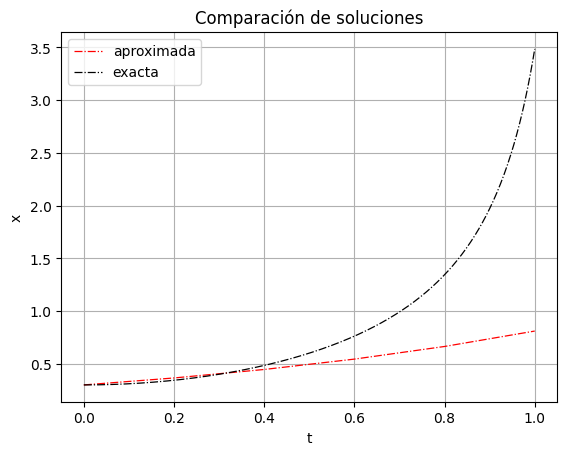

In [84]:
plt.plot(vector_T_em, vector_X_em, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-.', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

Re definimos nuestras variables simbolicas para poder trabjaralas con el programa

In [85]:
#t, x = sp.symbols('t x')

$x_{1} = x_{0} + (\frac{m_{0} + 2n_{0} + 2p_{0} + q_{0}}{6})\Delta t $

Definamos $m_{k} , n_{k} , p_{k} , q_{k}$

$m_{k} = f(t_{k},k_{k})$  
en nuestro caso particular sabemos que $m_{0}=f(t_{0},x_{0})=x_{0}$

In [86]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X]) 

In [87]:
dic_eval_rk_m = {
    t: vector_T_rk[0],
    x: vector_X_rk[0]
}

In [88]:
m_0 = func_f.subs(dic_eval_rk_m)
m_0

0.300000000000000

$n_{k} = f(t_{k} + \frac{\Delta t}{2}, y_{k} )$ donde $y_{k} = x_{k} + m_{k} \frac{\Delta t}{2}$  
en nuestro caso particular sabemos que $n_{0} = f(t_{0} + \frac{\Delta t}{2}, y_{0} ) = y_{0}$  
como $y_{0} = x_{0} + m_{0}\frac{\Delta t}{2}$ tenemos que  
$n_{0}= x_{0} + m_{0}\frac{\Delta t}{2}$

In [89]:
dic_eval_rk_n = {
    t: vector_T_rk[0] + (delta_T/2),
    x: vector_X_rk[0] + m_0*(delta_T/2)
}

In [90]:
n_0 = func_f.subs(dic_eval_rk_n)

$p_{k} = f(t_{k} + \frac{\Delta t}{2}, z_{k} )$ donde $z_{k} = x_{k} + n_{k}\frac{\Delta t}{2}$  
en nuestro caso particular sabemos que $p_{0} = f(t_{0} + \frac{\Delta t}{2}, z_{0} ) = z_{0}$  
como $z_{0} = x_{0} + n_{0}\frac{\Delta t}{2}$ tenemos que  
$p_{0} = x_{0} + n_{0}\frac{\Delta t}{2}$

In [91]:
dic_eval_rk_p = {
    t: vector_T_rk[0] + (delta_T/2),
    x: vector_X_rk[0] + n_0 * (delta_T/2)
}

In [92]:
p_0 = func_f.subs(dic_eval_rk_p)

$q_{k} = f(t_{k+1}, w_{k})$ donde $w_{k} = x_{k} + p_{k}\Delta t$  
en nuestro caso particular sabemos que $q_{0} =f(t_{1}, w_{0}) = w_{0}$  
como $w_{0} = x_{0} + p_{0}\Delta t$ tenemos que  
$q_{0} =  x_{0} + p_{0}\Delta t$

In [93]:
t_i = vector_T_rk[0] + delta_T
vector_T_rk = np.append(vector_T_rk, t_i)
vector_T_rk

array([0. , 0.2])

In [94]:
dic_eval_rk_q = {
    t: vector_T_rk[1] + (delta_T/2),
    x: vector_X_rk[0] + p_0 * (delta_T)
}

In [95]:
q_0 = func_f.subs(dic_eval_rk_q)

In [96]:
x_1 = vector_X_rk[0] + (delta_T/6) * (m_0 + 2 * n_0 + 2 * p_0 + q_0)
x_1

0.366420000000000

In [97]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk[iteracion],
        x: vector_X_rk[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m)

    dic_eval_rk_n = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n)
    
    dic_eval_rk_p = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p)

    t_i = vector_T_rk[iteracion] + delta_T
    vector_T_rk = np.append(vector_T_rk, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk[iteracion + 1] + (delta_T/2),
        x: vector_X_rk[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q)

    x_i = vector_X_rk[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk = np.append(vector_X_rk, x_i)

In [98]:
vector_T_rk

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [99]:
vector_X_rk

array([0.3, 0.366420000000000, 0.447545388000000, 0.546631936903200,
       0.667656247733568, 0.815475340981781], dtype=object)

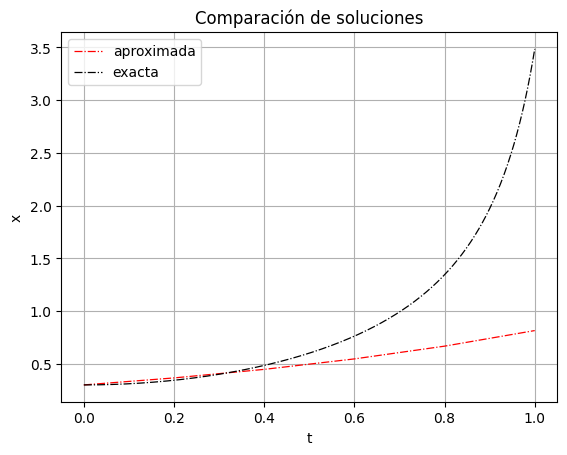

In [100]:
plt.plot(vector_T_rk, vector_X_rk, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-.', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

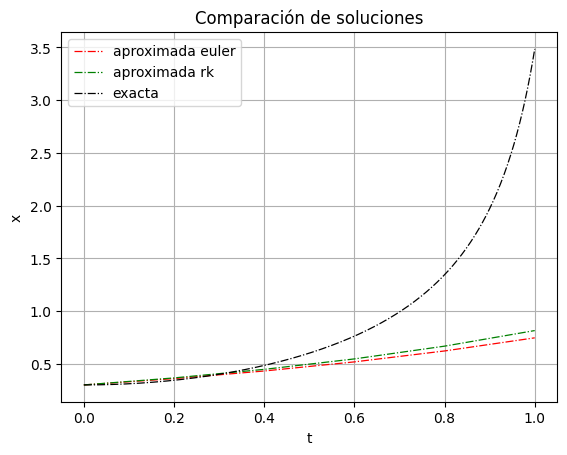

In [101]:
plt.plot(vector_T_euler, vector_X_euler, 'r-.', label='aproximada euler', linewidth=0.9, markersize=12)
plt.plot(vector_T_rk, vector_X_rk, 'g-.', label='aproximada rk', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-.', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

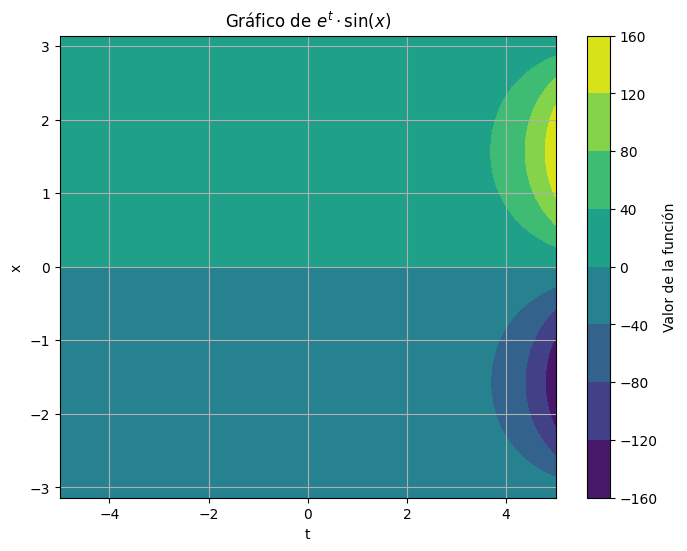

In [102]:
from sympy import symbols, exp, sin, lambdify
import matplotlib.pyplot as plt
import numpy as np

# Definir las variables
t, x = symbols('t x')

# Definir la función
funcion = exp(t) * sin(x)

# Convertir la función en una función numérica para graficar
funcion_numeric = lambdify((t, x), funcion, modules='numpy')

# Crear un rango de valores para t y x
t_values = np.linspace(-5, 5, 400)
x_values = np.linspace(-np.pi, np.pi, 400)

# Crear una rejilla de valores para t y x
T, X = np.meshgrid(t_values, x_values)

# Calcular los valores de la función en la rejilla
Z = funcion_numeric(T, X)

# Graficar la función
plt.figure(figsize=(8, 6))
plt.contourf(T, X, Z, cmap='viridis')
plt.colorbar(label='Valor de la función')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Gráfico de $e^t \cdot \sin(x)$')
plt.grid(True)
plt.show()
